# <font color='#faaa2e'>**First look and planging phase**</font>
In this file I will take a deep dive in the data structure and make a plan. This includes:

* Getting an overview over the data and collecting ideas what to do with it 
* planning an ELT process to transform and load the data into a new Dataset
    * What missing value treatement is nessessary
    * What is needed for the planned analyses   
    * preparing the data for statistical models
    



In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from src.workflow_manager.paths import data_path, ruleset_path
from src.pipelines.dataframe_analyzer import get_values

from src.pipelines.load_and_transform_pipeline import load_and_transform



pd.set_option('display.max_columns', None)

## <font color='#f88231'> First look and NA values</font>

In [2]:
data = pd.read_excel(data_path, sheet_name='data_set')
display(data.head(10))
data.info()

,contract_nr,bonus_malus _class_liability,bonus_malus _class_comprehensive,age_insured_person,policy_start,tariff_type,type_of_insurance,comprehensive_product included,deductible fully comprehensive,deductible partially comprehensive,payment_interval,insured_parties,profession_group,car_age_at_purchase,car_age_contract_start,annual_mileage,risk_predictor_zip_code,number_of_payment_faults
0,1,SF1/2,SF1/2,34,YOB,Original,New Vehicle,NaN,0,0,Monthly,Insured and Spouse/Partner,Standard,10,11,12000,5.0,1.0
1,2,SF31,SF31,55,YOB,Original,Change of Insurer,NaN,0,0,Pay In Full,Insured and Spouse/Partner,Standard,2,7,9000,6.0,NaN
2,3,SF5,SF5,52,YOB,Original,New Vehicle,VK,300,150,Monthly,Insured and Spouse/Partner,Standard,11,12,20000,1.0,NaN
3,4,SF15,SF15,41,YEB,Original,Change of Insurer,TK,0,150,Monthly,Insured and Spouse/Partner,Standard,0,9,15000,6.0,NaN
4,5,SF17,SF18,42,YOB,Original,Change of Insurer,VK,300,150,Monthly,Insured and Spouse/Partner,Standard,0,2,15000,3.0,NaN
5,6,SF7,SF13,37,YOB,Original,New Vehicle,VK,300,150,Monthly,Insured and Spouse/Partner,Standard,0,0,15000,7.0,NaN
6,7,SF9,SF9,37,YEB,Original,Change of Insurer,VK,300,300,Monthly,Insured and Spouse/Partner,Standard,0,2,9000,7.0,NaN
7,8,SF3,SF3,22,YEB,Pay per km,Change of Insurer,VK,300,150,Monthly,Insured and Others,Standard,0,3,6000,3.0,NaN
8,9,SF19,SF14,78,YOB,Original,Change of Insurer,VK,300,150,Monthly,Insured and Spouse/Partner,Standard,0,3,6000,1.0,NaN
9,10,SF4,SF4,34,YEB,Original,Change of Insurer,VK,500,150,Monthly,Insured and Spouse/Partner,Standard,0,3,6000,6.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27950 entries, 0 to 27949
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   contract_nr                          27950 non-null  int64  
 1   bonus_malus _class_liability         27950 non-null  object 
 2   bonus_malus _class_comprehensive     27950 non-null  object 
 3   age_insured_person                   27950 non-null  int64  
 4   policy_start                         27940 non-null  object 
 5   tariff_type                          27950 non-null  object 
 6   type_of_insurance                    27950 non-null  object 
 7   comprehensive_product included       20355 non-null  object 
 8   deductible fully comprehensive       27950 non-null  int64  
 9   deductible partially  comprehensive  27950 non-null  int64  
 10  payment_interval                     27950 non-null  object 
 11  insured_parties             

#### <font color='#f88231'> **closer look at missing zip_codes**</font>

In [3]:
display(data.loc[data.risk_predictor_zip_code.isna()])
display(data.risk_predictor_zip_code.value_counts(normalize=True))
print('lost volume:', np.round(data.loc[data.risk_predictor_zip_code.isna()].shape[0] / data.shape[0] * 100, 4 ),'%')

,contract_nr,bonus_malus _class_liability,bonus_malus _class_comprehensive,age_insured_person,policy_start,tariff_type,type_of_insurance,comprehensive_product included,deductible fully comprehensive,deductible partially comprehensive,payment_interval,insured_parties,profession_group,car_age_at_purchase,car_age_contract_start,annual_mileage,risk_predictor_zip_code,number_of_payment_faults
16134,16135,SF3,SF3,33,YEB,Original,Change of Insurer,NaN,0,0,Monthly,Insured and Spouse/Partner,Standard,0,4,10000,NaN,1.0
19541,19542,SF12,SF12,42,YEB,Original,Change of Insurer,VK,300,150,Monthly,Insured and Spouse/Partner,Standard,3,11,6000,NaN,NaN


risk_predictor_zip_code
4.0    0.118971
6.0    0.117969
5.0    0.116431
3.0    0.112674
7.0    0.111385
9.0    0.110920
8.0    0.107986
2.0    0.107056
1.0    0.096608
Name: proportion, dtype: float64

lost volume: 0.0072 %


In [4]:
data.loc[data.policy_start.isna()]

,contract_nr,bonus_malus _class_liability,bonus_malus _class_comprehensive,age_insured_person,policy_start,tariff_type,type_of_insurance,comprehensive_product included,deductible fully comprehensive,deductible partially comprehensive,payment_interval,insured_parties,profession_group,car_age_at_purchase,car_age_contract_start,annual_mileage,risk_predictor_zip_code,number_of_payment_faults
91,92,SF1/2,SF1/2,39,NaN,Original,First Vehicle,NaN,0,0,Monthly,Insured and Spouse/Partner,Standard,20,21,20000,9.0,3.0
5604,5605,SF1/2,SF1/2,37,NaN,Original,First Vehicle,TK,0,150,Pay In Full,Insured and Spouse/Partner,Standard,5,6,12000,8.0,NaN
9265,9266,SF4,SF4,31,NaN,Original,Change of Insurer,TK,0,150,Monthly,Insured and Spouse/Partner,Standard,3,8,12000,8.0,NaN
12531,12532,SF3,SF3,64,NaN,Original,New Vehicle,TK,0,150,Monthly,Insured and Others,Standard,9,10,25000,3.0,NaN
13777,13778,SF16,SF16,59,NaN,Original,New Vehicle,NaN,0,0,Monthly,Insured and Spouse/Partner,Standard,13,14,9000,8.0,NaN
20047,20048,SF1/2,SF1/2,36,NaN,Original,First Vehicle,NaN,0,0,Monthly,Insured and Spouse/Partner,Standard,14,15,12000,5.0,10.0
20591,20592,SF8,SF8,62,NaN,Original,New Vehicle,TK,0,150,Monthly,Insured and Spouse/Partner,Standard,11,12,12000,1.0,NaN
23883,23884,SF7,SF7,37,NaN,Original,Change of Insurer,VK,300,150,Monthly,Insured and Spouse/Partner,Standard,1,3,9000,9.0,NaN
25487,25488,SF20,SF20,43,NaN,Original,New Vehicle,NaN,0,0,Monthly,Insured and Spouse/Partner,Standard,11,12,12000,7.0,NaN
27233,27234,SF1/2,SF1/2,28,NaN,Pay per km,First Vehicle,NaN,0,0,Monthly,Insured and Spouse/Partner,Standard,19,20,12000,9.0,3.0


### <font color='#f88231'> **conclusion**  </font>
* the columns need to be renamed, since there are whitespaces in the names  

* there are many columns that need to be one-hot-encoded since their values are Strings 

* NA values in **number_of_payment_faults** will be set to 0 (since NA means no payment_faults)

* NA values in **comprehensive_product_included** have meaning and will be dealt with in the one-hot-encoding

* NA values in **policy_start** will be filled, since:  
    - "New Vehicle" and "First Vehicle" is not possible in YEB
    - "Change of Insurer" is most likely YOB, since most insurers only allow a change at YEB  


* NA values in **risk_predictor_zip_code** will be dropped, since:  
    - there are only 2 rows with missing data (~0.0072% of the observed dataset)
    - the gains to predict these **risk_predictor_zip_code** would be little compared to the effort
    - the **risk_predictor_zip_code** groups have roughly the same size, so there is no group they will be most likely be in  

   


---

## <font color='#f88231'>Deep-Dive into the single values of the Dataframe</font>
This will help to decide what columns:
* need to be one-hot-encoded and which of the values will be droped in the one-hot-encoding

* what values need special treatement (e.g. SF-Classes to float)

* if there are fields with an strongly skewed distribution

* if the distribution of the columns are as expected

* Ideas for new columns will be collected

In [5]:
10/279

0.035842293906810034

In [6]:
# get all the different Values in each field, if there are not too many
for col in list(data.columns)[1:]:
    get_values(data, col, normalize=True)


bonus_malus _class_liability :  48  values


bonus_malus _class_comprehensive :  48  values


age_insured_person :  76  values




,policy_start,proportion
0,YOB,0.58
1,YEB,0.42


,tariff_type,proportion
0,Original,0.86
1,Pay per km,0.14


,type_of_insurance,proportion
0,Change of Insurer,0.69
1,New Vehicle,0.25
2,First Vehicle,0.06


,comprehensive_product included,proportion
0,VK,0.7
1,TK,0.3


,deductible fully comprehensive,proportion
0,0,0.49
1,300,0.37
2,500,0.10
3,1000,0.04


,deductible partially comprehensive,proportion
0,150,0.65
1,0,0.27
2,300,0.07
3,500,0.01


,payment_interval,proportion
0,Monthly,0.97
1,Pay In Full,0.03


,insured_parties,proportion
0,Insured and Spouse/Partner,0.86
1,Insured and Others,0.14


,profession_group,proportion
0,Standard,0.84
1,Public service,0.16




car_age_at_purchase :  33  values


car_age_contract_start :  36  values


annual_mileage :  79  values




,risk_predictor_zip_code,proportion
0,4.0,0.12
1,6.0,0.12
2,5.0,0.12
3,3.0,0.11
4,7.0,0.11
5,9.0,0.11
6,8.0,0.11
7,2.0,0.11
8,1.0,0.10


,number_of_payment_faults,proportion
0,1.0,0.36
1,2.0,0.23
2,3.0,0.12
3,4.0,0.08
4,5.0,0.06
5,6.0,0.05
6,7.0,0.04
7,8.0,0.02
8,9.0,0.01
9,10.0,0.01


### <font color='f7951e'> Distributions </font>
**(i)** of the bonus_malus_classes will be looked at a later step, since the values first need to be transformed to sort them.  
**(i)** only columns that couldnt be printed or should be seen side by side are plotted here 



<Axes: >

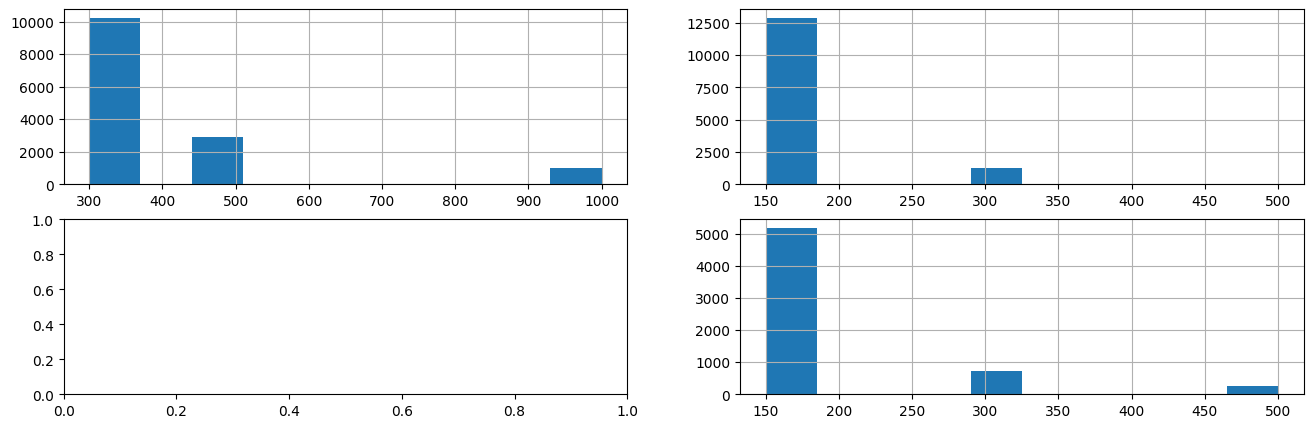

In [7]:
## Distribution of the eductables

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(16,5))
data.loc[data['comprehensive_product included'] == 'VK', 'deductible fully comprehensive'].hist(ax = ax1)
data.loc[data['comprehensive_product included'] == 'VK', 'deductible partially  comprehensive'].hist(ax = ax2)
data.loc[data['comprehensive_product included'] == 'TK', 'deductible partially  comprehensive'].hist(ax=ax4)

<Axes: >

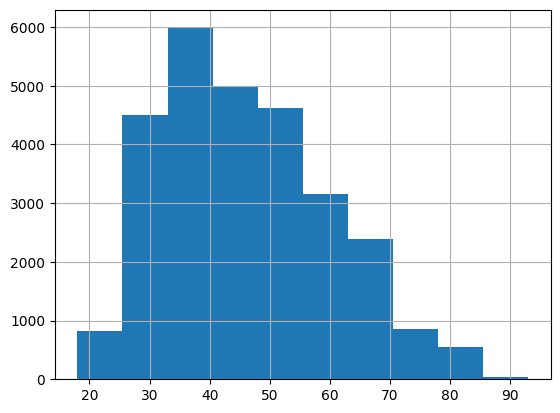

In [8]:
# age of customers
data.age_insured_person.hist()

<Axes: >

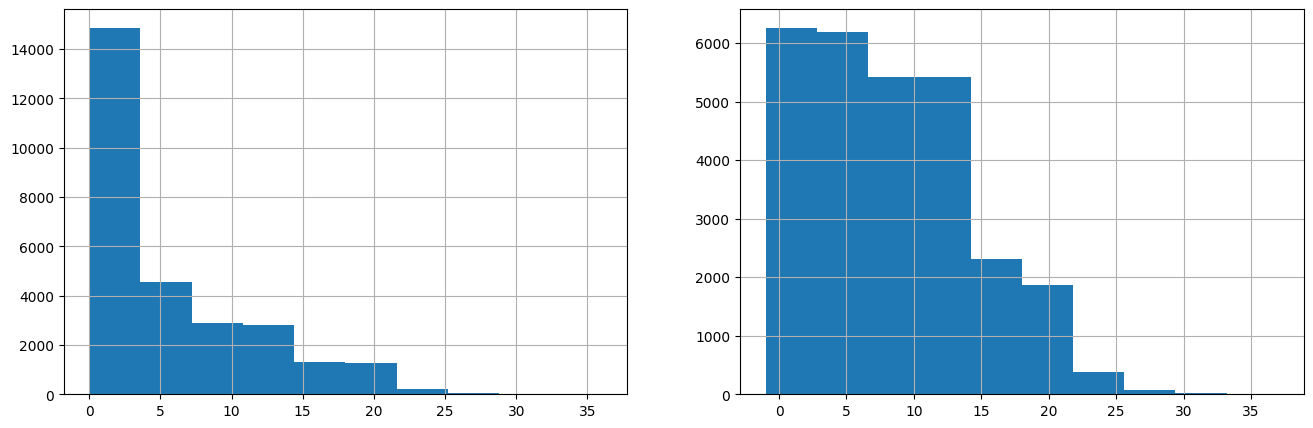

In [9]:
# age of vahicles
fig, (ax1, ax2)= plt.subplots(1,2,figsize=(16,5))

data.car_age_at_purchase.hist(ax=ax1)
data.car_age_contract_start.hist(ax=ax2)

<Axes: >

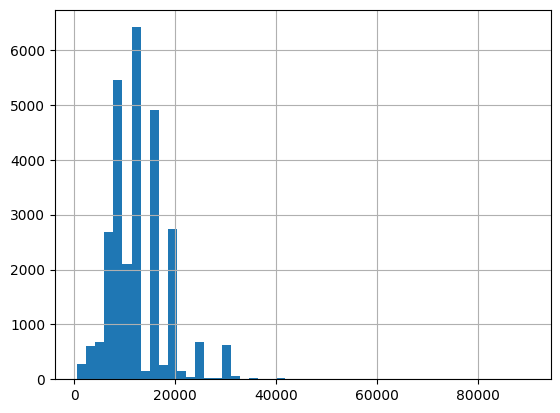

In [10]:
# milage: most choose standard steps
data.annual_mileage.hist(bins=50)

In [11]:
# number_of_payment_faults and number od installments
display(pd.DataFrame(data.loc[data.number_of_payment_faults > 1, 'payment_interval'].value_counts()).reset_index())

,payment_interval,count
0,Monthly,3045
1,Pay In Full,8


### <font color='#f88231'> **conclusion**  </font>
* the distribustion of the fields are mostly as expected  
    insteresting: **tariff_type: Pay per km** is only 14%

* Friday is usually not the first insurer, but that makes sence, since the company only exsists since 2017.

#### <font color='#f7951e'>changes in the values needed</font>
* **bonus_malus _class_liability** and **bonus_malus _class_comprehensive** will be represented as float in new columns **bonus_malus _class_liability_num** and **bonus_malus _class_comprehensive_num**.  
    The original columns will be kept for better labeling 

* **payment_interval** to 1 for yearly payment and 12 for monthly payment as installments


#### <font color='#f7951e'>possible new fields</font>
* **car_age_at_purchase** + **car_age_contract_start** can indicate if Friday was the first insurer (when they are the same)

* **annual_mileage** + **tariff_type** can give insight if these customers tend to over- or underestimate their milage


#### <font color='#f7951e'>special treatement</font>
* **annual_mileage** top 5% have a wide spread => this could be capped for better and more reliable model fits


* what value to drop in the one-hot-emcoding:
    * **policy_start** -> into YEB 1/0
    * **type_of_insurance** -> keep all and drop  
    * **comprehensive_productincluded** -> NAs will disappear automatically with one-hot encoding
    * **profession_group** -> drop Standard, keep 'Public service'
    * **insured_parties**  -> drop 'Insured and Spouse/Partner', keep 'Insured and Others'


    
--- 

### <font color='#f7951e'>Notes</font>
* **type_of_insurance first vehicle** what does this mean?   
* **number_of_payment_faults** either includes follow-up notices or the the timeperiod is longer than 1 year. 8 policies have multiple notices and a yearly payment plan.
* the **bonus_malus _classes** are not up to date. they should reach up to 60.
---




## <font color='#f88231'>Test to transform the data</font>
This lines load the data through the pipeline, that was creates with the changes from the first part and shows it. 

### **Next Step** is analyzing the data in power bi.

In [12]:
data_clean = load_and_transform(data_path, ruleset_path)
data_clean.to_csv('./data/clean/Friday_data.csv', sep=';', index=False)
data_clean.head()

,contract_nr,bonus_malus_class_liability,bonus_malus_class_comprehensive,age_insured_person,policy_start,tariff_type,type_of_insurance,comprehensive_product_included,deductible_fully_comprehensive,deductible_partially_comprehensive,payment_interval,insured_parties,profession_group,car_age_at_purchase,car_age_contract_start,annual_mileage,risk_predictor_zip_code,number_of_payment_faults,SF_KH_num,SF_VK_num,payment_fault,young_driver,Friday_first
0,1,SF1/2,SF1/2,34,YOB,Original,New Vehicle,KH,0,0,Monthly,Insured and Spouse/Partner,Standard,10,11,12000,5.0,1.0,0.5,0.5,1,0,0
1,2,SF31,SF31,55,YOB,Original,Change of Insurer,KH,0,0,Pay In Full,Insured and Spouse/Partner,Standard,2,7,9000,6.0,0.0,31.0,31.0,0,0,0
2,3,SF5,SF5,52,YOB,Original,New Vehicle,VK,300,150,Monthly,Insured and Spouse/Partner,Standard,11,12,20000,1.0,0.0,5.0,5.0,0,0,0
3,4,SF15,SF15,41,YEB,Original,Change of Insurer,TK,0,150,Monthly,Insured and Spouse/Partner,Standard,0,9,15000,6.0,0.0,15.0,15.0,0,0,0
4,5,SF17,SF18,42,YOB,Original,Change of Insurer,VK,300,150,Monthly,Insured and Spouse/Partner,Standard,0,2,15000,3.0,0.0,17.0,18.0,0,0,0


---
#### **done**